# Random Forest for Regression - Basic

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
my_df = pd.read_csv("data/sample_data_regression.csv")

In [3]:
my_df

,output,input1,input2,input3
0,564,534,536,466
1,182,264,103,244
2,323,272,339,609
3,438,416,444,330
4,547,520,464,104
...,...,...,...,...
95,150,259,181,336
96,372,299,271,338
97,414,523,455,526
98,729,683,641,601


In [4]:
X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
regressor = RandomForestRegressor(random_state = 42, n_estimators = 1000)

In [10]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [11]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.6869519329653004

In [12]:
# Feature Importance
regressor.feature_importances_

feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

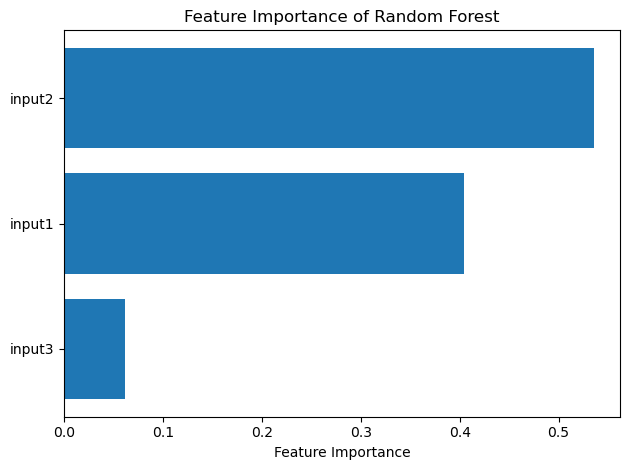

In [14]:
import matplotlib.pyplot as plt

plt.barh(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()